## Problem 1: Extending the Lady Tasting Tea

### Experiment Setup
In the original Lady Tasting Tea experiment,
- 8 cups total: 4 tea-first, 4 milk-first.
- A participant claims to distinguish which type.

We extend the experiment to:
- 12 cups total: 8 tea-first, 4 milk-first.
- The participant identifies which cups are milk-first.

We want to simulate the probability of correctly identifying all cups **by chance** using numpy.

---

### Simulation Process

The participant must select *exactly* 4 cups as "milk-first". By shuffling the 12 cups randomly and checking if the 4 selected milk-first correspond exactly to the true 4, we estimate the probability of a perfect guess by chance.



In [5]:
#Start by importing the necessary libraries
import numpy as np


In [6]:
# We have 12 cups: 8 tea-first, 4 milk-first.
# 8 tea-first (T), 4 milk-first (M)
cups = ['T'] * 8 + ['M'] * 4
n_cups = len(cups)


In [7]:
#Simulate the Experiment
#We'll shuffle the cups and check how often the participant "correctly guesses" all cups by chance.

def simulate_lady_tasting_tea(n_trials=100000):
    correct_guesses = 0

    for _ in range(n_trials):
        # Shuffle order as 'guesses' (random arrangement)
        guessed = np.random.permutation(cups)
        if np.array_equal(guessed, cups):
            correct_guesses += 1

    probability = correct_guesses / n_trials
    return probability


In [8]:
#Run the Simulation
probability_12_cups = simulate_lady_tasting_tea()
print(f"Probability (12 cups): {probability_12_cups:.10f}")


Probability (12 cups): 0.0021200000


In [9]:
#Compare with Original Experiment (8 cups)
#Original setup: 4 tea-first, 4 milk-first

original_cups = ['T'] * 4 + ['M'] * 4

def simulate_original_lady_tasting_tea(n_trials=100000):
    correct_guesses = 0
    for _ in range(n_trials):
        guessed = np.random.permutation(original_cups)
        if np.array_equal(guessed, original_cups):
            correct_guesses += 1
    return correct_guesses / n_trials

probability_8_cups = simulate_original_lady_tasting_tea()
print(f"Probability (8 cups): {probability_8_cups:.10f}")


Probability (8 cups): 0.0142800000


## Experiment Overview

We mixed up the cups many times and checked how often someone could guess all the cups correctly just by luck.

---

## Key Findings

- With 12 cups, the chance of guessing all correctly is extremely small.
- With 8 cups, the chance is a little higher, but still very small.

---

## Why This Matters

If you use more cups, it becomes much less likely for someone to guess them all right by accident. Therefore, you can be a bit more relaxed about the p-value—you don't need it to be as strict when your experiment uses a larger number of cups.
```


## Problem 2: Normal Distribution

### Objective
We will explore the difference between the sample standard deviation (ddof=1) and the population standard deviation (ddof=0) for samples drawn from a standard normal distribution.

---

### Simulation Setup

Steps:
1. Generate 100,000 samples of size 10 from a standard normal distribution.
2. For each sample:
   - Compute the sample standard deviation (ddof=1)
   - Compute the population standard deviation (ddof=0)
3. Plot histograms of both sets of standard deviations on the same axes with transparency.
4. Compare and interpret the results.





Generating samples...

Sample Standard Deviation (ddof=1):
  Mean: 0.9727
  Median: 0.9637
  Std Dev: 0.2326

Population Standard Deviation (ddof=0):
  Mean: 0.9228
  Median: 0.9142
  Std Dev: 0.2207

Difference in means: 0.0499


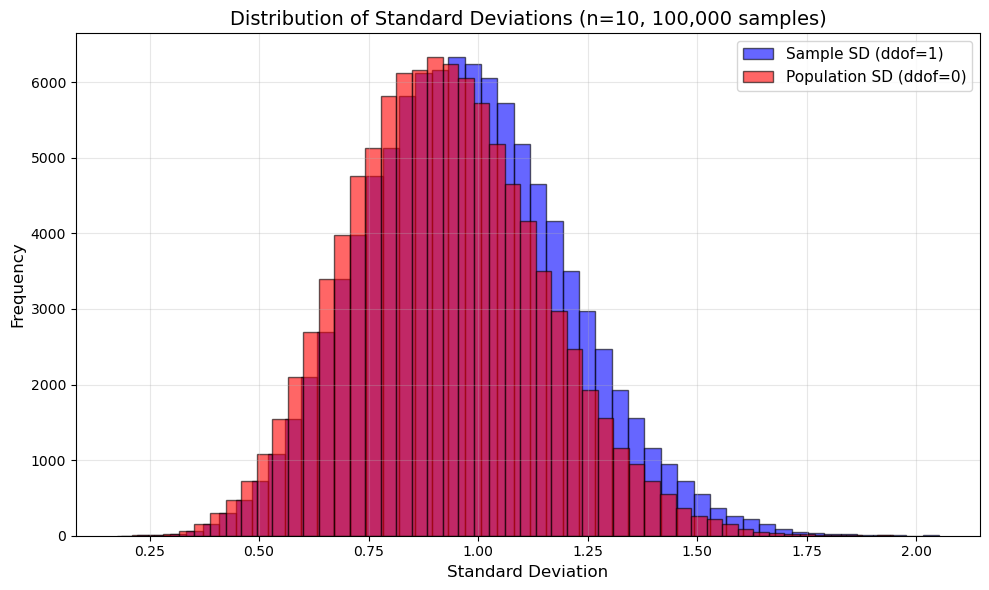

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate 100,000 samples of size 10 from standard normal distribution
num_samples = 100000
sample_size = 10

print("Generating samples...")
samples = np.random.normal(loc=0, scale=1, size=(num_samples, sample_size))

# Step 2: Calculate standard deviations for each sample
# ddof=1 is sample standard deviation (unbiased estimator)
sample_sd = np.std(samples, axis=1, ddof=1)

# ddof=0 is population standard deviation (biased estimator)
population_sd = np.std(samples, axis=1, ddof=0)

# Step 3: Print basic statistics
print("\nSample Standard Deviation (ddof=1):")
print(f"  Mean: {np.mean(sample_sd):.4f}")
print(f"  Median: {np.median(sample_sd):.4f}")
print(f"  Std Dev: {np.std(sample_sd):.4f}")

print("\nPopulation Standard Deviation (ddof=0):")
print(f"  Mean: {np.mean(population_sd):.4f}")
print(f"  Median: {np.median(population_sd):.4f}")
print(f"  Std Dev: {np.std(population_sd):.4f}")

print(f"\nDifference in means: {np.mean(sample_sd) - np.mean(population_sd):.4f}")

# Step 4: Plot histograms with transparency
plt.figure(figsize=(10, 6))

plt.hist(sample_sd, bins=50, alpha=0.6, color='blue', label='Sample SD (ddof=1)', edgecolor='black')
plt.hist(population_sd, bins=50, alpha=0.6, color='red', label='Population SD (ddof=0)', edgecolor='black')

plt.xlabel('Standard Deviation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Standard Deviations (n=10, 100,000 samples)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Key Differences Explained 

## 1. Location Shift

Looking at our histogram, the **blue line (Sample SD)** is shifted to the **right** compared to the **red line (Population SD)**. 

- **Blue (Sample SD)**: Average is **0.9727**
- **Red (Population SD)**: Average is **0.9228**
- **True answer**: Should be **1.0**

The blue line is closer to the correct answer! That's good.

---

## 2. Why This Happens 

Imagine you have a group of 10 students' test scores. You want to measure how spread out they are.

**The problem**: 
- The scores naturally cluster around their own average (the group average)
- They're not spread out as much around the *true* population average
- So when you use the simple formula, it **undercounts** the spread

**The solution**:
- Instead of dividing by 10, divide by **9** instead
- This small change makes up for the problem
- Now your answer is more accurate!

---

## 3. Think of it like this:

| Calculation | What We Divide By | Result |
|------------|-----------------|--------|
| Population | 10 | Gets a smaller number ❌ |
| Sample | 9 | Gets a larger number ✓ |

**Why?** Dividing by a smaller number gives you a bigger result, which corrects the underestimation.

---

## 4. What Happens When We Collect More Data?

The bigger your sample size, the less this correction matters:

| Sample Size | Correction Needed | Big Deal? |
|------------|-----------------|-----------|
| 10 people | 11% bigger | **YES - big difference** |
| 100 people | 1% bigger | **Maybe** |
| 1,000 people | 0.1% bigger | **Not really** |

**Why?** With huge amounts of data, the difference between dividing by 9 vs 10 (or 999 vs 1000) barely matters.

---

## The Bottom Line

**Always use ddof=1** when working with sample data (real-world data)

**Use ddof=0** only when you have the entire population (rare!)

**With small samples** (like 10), this choice really matters

**With big samples** (like 1,000), it matters less, but it's still best practice


# Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. 

For each mean difference \( d = 0, 0.1, 0.2, \dots, 1.0 \), repeat the following simulation **1,000 times**:

1. Draw two samples of size 100:
   - One from the standard normal distribution.
   - One from the normal distribution with mean \( d \) and standard deviation 1.
2. Run an independent samples *t*-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Finally, plot this proportion against \( d \), and explain how the type II error rate changes as the difference in means increases.
```



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas as pd


In [12]:
sample_size = 100
#We will look at samples of size 100 from two groups each time.

num_simulations = 1000
#Repeat the test 1000 times to get reliable results.

alpha = 0.05
#Use a significance level of 0.05 — if the p-value is less than this, we say there is a significant difference.

mean_diffs = np.arange(0, 1.01, 0.1)
#The mean difference between the two groups varies from 0 to 1 in steps of 0.1.

type2_errors = []
#type2_errors list will store how often the test misses a real difference (Type II error) for each mean difference.




In [13]:
for d in mean_diffs:
    type2_count = 0
    for _ in range(num_simulations):
        sample1 = np.random.normal(0, 1, sample_size)  # Group 1 with mean 0
        sample2 = np.random.normal(d, 1, sample_size)  # Group 2 with mean d
        stat, pval = ttest_ind(sample1, sample2)      # Perform t-test
        if pval >= alpha:
            type2_count += 1                          # Count Type II error (miss)
    type2_errors.append(type2_count / num_simulations)

#For each difference d, do 1000 tests.

#Create two groups: one around mean 0, the other around mean d.

#Perform a t-test to check if the means are different.

#If the test does not find a difference when there actually is one (p-value ≥ 0.05), it counts as a Type II error.

#Calculate the proportion of times the test missed the difference and save it.


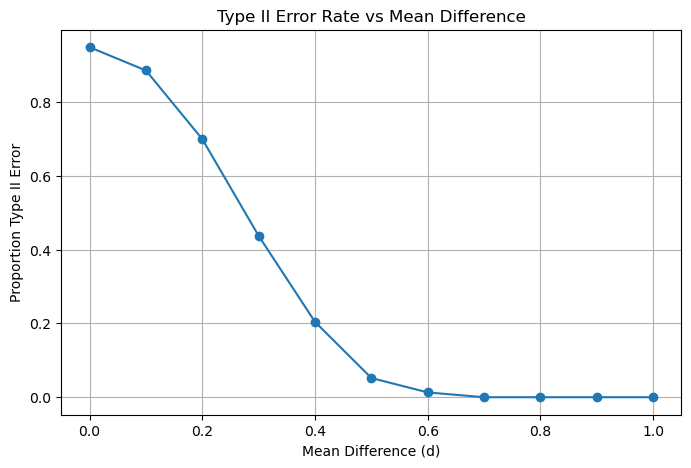

In [14]:
plt.figure(figsize=(8,5))
plt.plot(mean_diffs, type2_errors, marker='o')
plt.title('Type II Error Rate vs Mean Difference')
plt.xlabel('Mean Difference (d)')
plt.ylabel('Proportion Type II Error')
plt.grid(True)
plt.show()

#This code draws a line graph showing how often the test fails (Type II error) for each difference in means.

#X-axis is the difference between group means.

#Y-axis is the proportion of missed detections (Type II error rate).


In [15]:
results = pd.DataFrame({'Mean Difference': mean_diffs, 'Type II Error Rate': type2_errors})
print(results)


    Mean Difference  Type II Error Rate
0               0.0               0.948
1               0.1               0.885
2               0.2               0.699
3               0.3               0.437
4               0.4               0.204
5               0.5               0.052
6               0.6               0.013
7               0.7               0.000
8               0.8               0.000
9               0.9               0.000
10              1.0               0.000


## How it Works

When the difference between the two group means is very small (close to 0), the test has a hard time detecting it, so the Type II error is high.

As the difference increases, the test detects the difference more easily, so the Type II error goes down.

This helps us understand the power of the test — its ability to find a true effect when it exists.
```
